# Vizualizace dat

Zadání:

V jednom ze cvičení jste probírali práci s moduly pro vizualizaci dat. Mezi nejznámější moduly patří matplotlib (a jeho nadstavby jako seaborn), pillow, opencv, aj. Vyberte si nějakou zajímavou datovou sadu na webovém portále Kaggle a proveďte datovou analýzu datové sady. Využijte k tomu různé typy grafů a interpretujte je (minimálně alespoň 5 zajímavých grafů). Příklad interpretace: z datové sady pro počasí vyplynulo z liniového grafu, že v létě je vyšší rozptyl mezi minimální a maximální hodnotou teploty. Z jiného grafu vyplývá, že v létě je vyšší průměrná vlhkost vzduchu. Důvodem vyššího rozptylu může být absorpce záření vzduchem, který má v létě vyšší tepelnou kapacitu.


# Analýza a vizualizace dat o fotbalových hráčích a nejlepších ligách z hlediska počtu gólů a očekávaných gól (xG)

Zdroj databáze od Kaggle: https://www.kaggle.com/datasets/mohamedhanyyy/top-football-leagues-scorers

## Databáze
* Je ve formátu CSV.
* Obsahuje počet gólů a očekáváný gól hráčů z ligách Premier League (Anglie), Ligue 1 (Francie), Bundesliga (Německo), Seria A (Itálie), Campeonato Brasileiro Série A, MLS (USA), Eredivisie (Nizozemsko).
* Obsahuje pouze data o 3 sezonách 2016/2017, 2017/2018 a 2018/2019.

## Moduly pro vizualizaci dat 
* Matplotlib.pyplot slouží k vytváření široké škály grafů a vizualizací
* 	Seaborn jedná se o nadstavbu nad knihovnou Matplotlib, která usnadňuje vytváření atraktivních a informativních grafů. Seaborn poskytuje jednoduché funkce pro vytváření různých typů grafů, jako jsou sloupcové grafy, krabicové grafy, teplotní mapy a další. Tato knihovna také nabízí přednastavené barevné palety a stylizaci grafů, což usnadňuje tvorbu profesionálně vypadajících vizualizací
* Pomocí používání obou modulů může být použit pro zdokonalení vzhledu grafů


# Importování knihovnů a načtení dat

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont
import cv2

data = pd.read_csv("Data.csv")

# Graf 1: Top 10 střelců s nejvíce góly

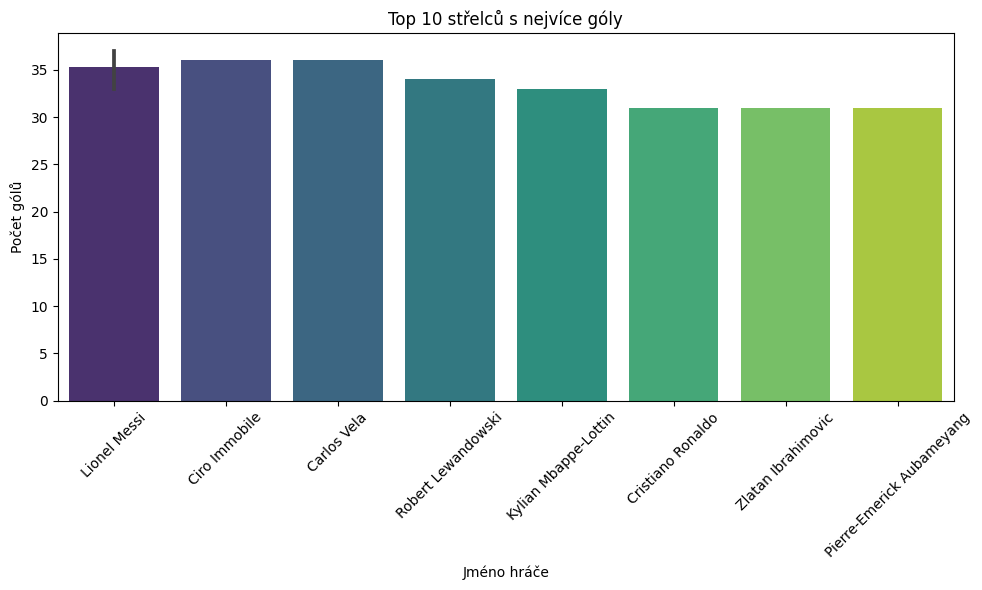

In [27]:
# Graf 1: Top 10 střelců s nejvíce góly
top10_scorers = data.sort_values(by="Goals", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Player Names", y="Goals", data=top10_scorers, palette="viridis")
plt.xlabel("Jméno hráče")
plt.ylabel("Počet gólů")
plt.title("Top 10 střelců s nejvíce góly")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graf 2: Top 10 hráčů s nejvyšším xG

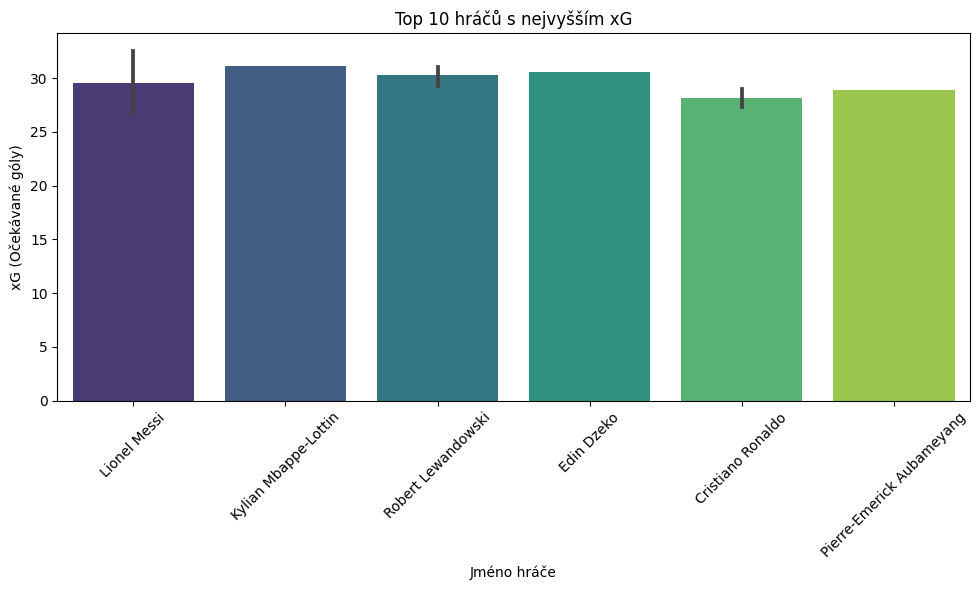

In [28]:
# Graf 2: Top 10 hráčů s nejvyšším xG
top10_xG_scorers = data.sort_values(by="xG", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Player Names", y="xG", data=top10_xG_scorers, palette="viridis")
plt.xlabel("Jméno hráče")
plt.ylabel("xG (Očekávané góly)")
plt.title("Top 10 hráčů s nejvyšším xG")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graf 3: Top 10 hráčů s nejvyšším očekávaným počtem gólů (xG)

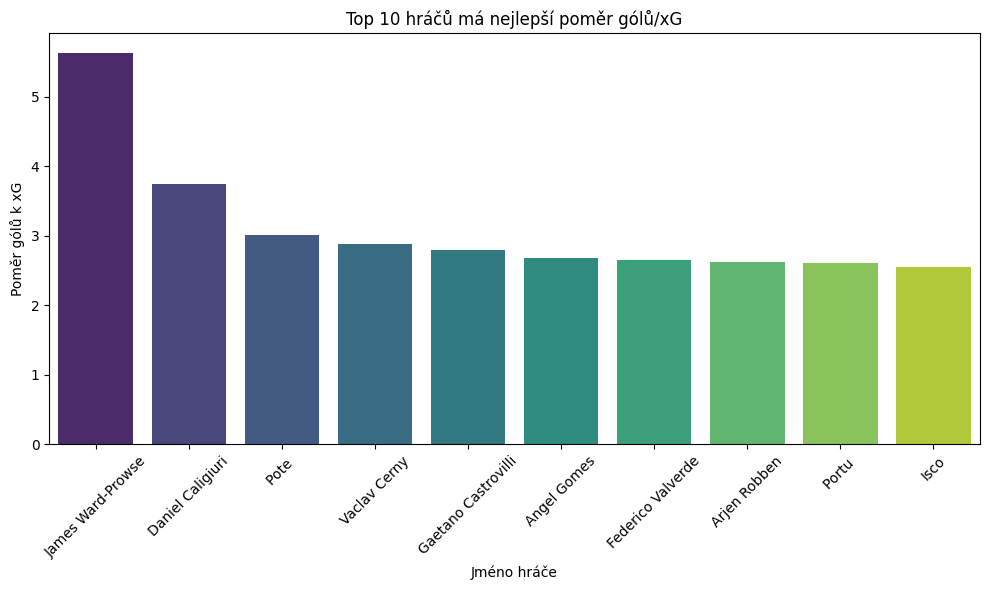

In [29]:
# Graf 3: Top 10 hráčů má nejlepší poměr gólů/xG
data["Goal Conversion Rate"] = data["Goals"] / data["xG"]
top10_scorers_conversion = data.sort_values(by="Goal Conversion Rate", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Player Names", y="Goal Conversion Rate", data=top10_scorers_conversion, palette="viridis")
plt.xlabel("Jméno hráče")
plt.ylabel("Poměr gólů k xG")
plt.title("Top 10 hráčů má nejlepší poměr gólů/xG")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graf 4: Top ligy podle celkového počtu gólů

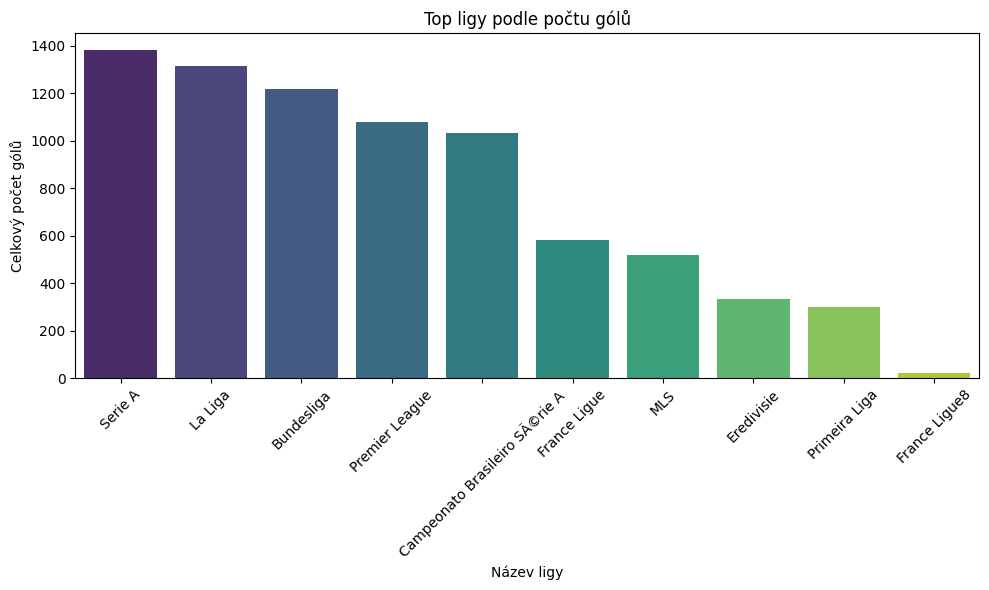

In [30]:
# Graf 4: Top ligy podle počtu gólů
total_goals_by_league = data.groupby("League")["Goals"].sum().reset_index()
top_leagues = total_goals_by_league.sort_values(by="Goals", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="League", y="Goals", data=top_leagues, palette="viridis")
plt.xlabel("Název ligy")
plt.ylabel("Celkový počet gólů")
plt.title("Top ligy podle počtu gólů")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graf 5: Top ligy podle celkového očekávaného počtu gólů (xG)

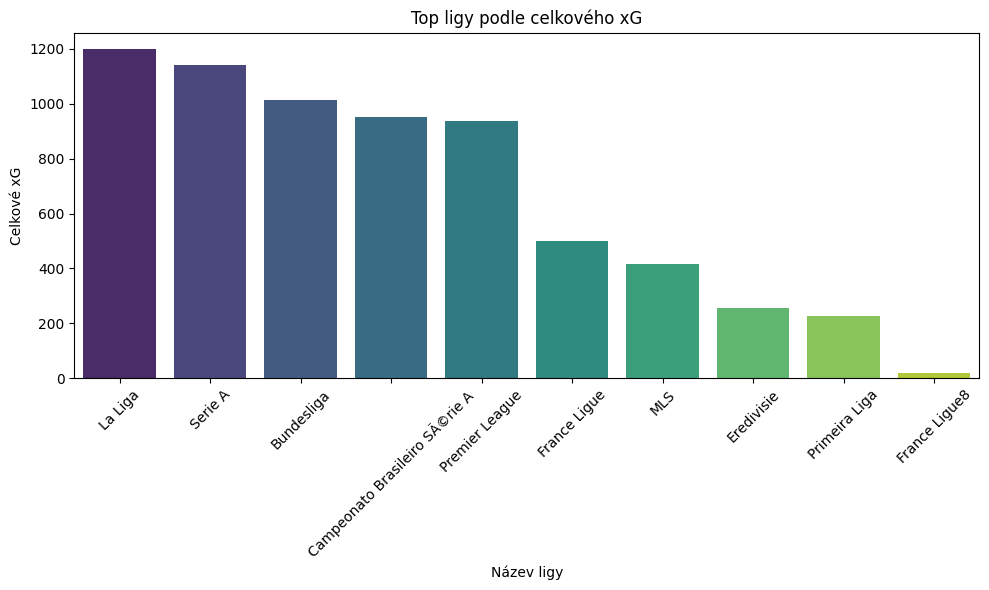

In [31]:
# Graf 5: Top ligy podle celkového očekávaného počtu gólů (xG)
total_xG_by_league = data.groupby("League")["xG"].sum().reset_index()
top_leagues = total_xG_by_league.sort_values(by="xG", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="League", y="xG", data=top_leagues, palette="viridis")
plt.xlabel("Název ligy")
plt.ylabel("Celkové xG")
plt.title("Top ligy podle celkového xG")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graf 6: Top ligy podle průměrného poměru gólů k očekávaným gólům (xG)

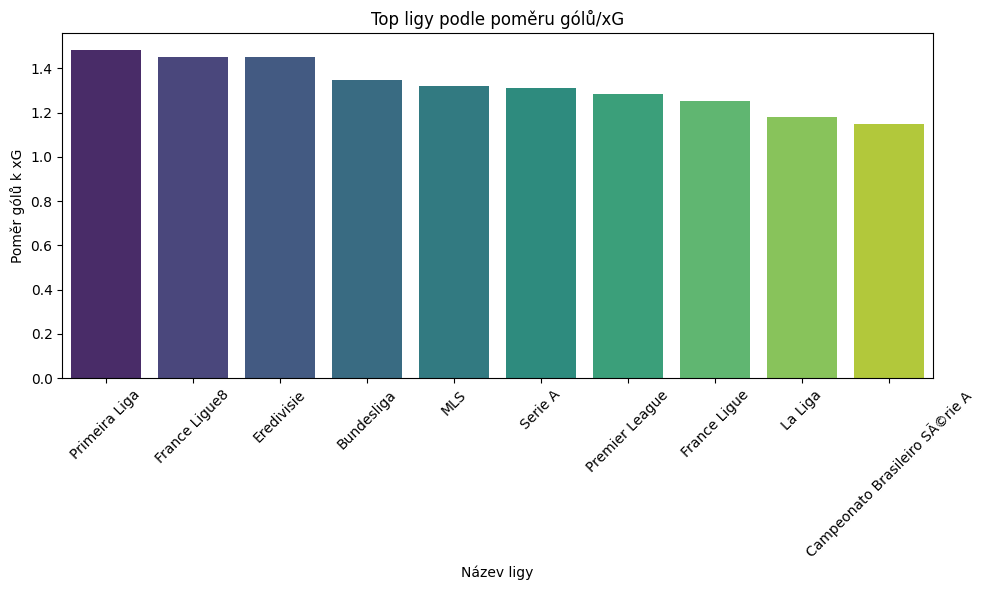

In [32]:
# Graf 6: Top ligy podle průměrného poměru gólů k očekávaným gólům (xG)
data["Goal Conversion Rate"] = data["Goals"] / data["xG"]
conversion_rate_by_league = data.groupby("League")["Goal Conversion Rate"].mean().reset_index()
top_leagues = conversion_rate_by_league.sort_values(by="Goal Conversion Rate", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="League", y="Goal Conversion Rate", data=top_leagues, palette="viridis")
plt.xlabel("Název ligy")
plt.ylabel("Poměr gólů k xG")
plt.title("Top ligy podle poměru gólů/xG")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()